<center><h1>Evaluacion 4</h1></center>
<h5>Freddy Jaimes CI.30391404</h5>

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

RESULTADOS_DIR = "Resultados"



def leer_modelo(ruta):
    modelo = pd.read_csv(ruta, sep="\s+", skiprows=3,
                         usecols=["YYYYMMDD", "HHMM", "M(m/s)", "D(deg)"],
                         parse_dates={"MarcaTemporal": [0, 1]}, index_col="MarcaTemporal")
    modelo.rename(columns={"M(m/s)": "Velocidad(m/s)",
                           "D(deg)": "Direccion(deg)"},
                  inplace=True)
    return modelo


<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Freddy\AppData\Local\Temp\ipykernel_512\3271758147.py:17: SyntaxWarning: invalid escape sequence '\s'
  modelo = pd.read_csv(ruta, sep="\s+", skiprows=3,


<center><h2>Matriz de figuras de dispersión de los primeros 1000 registros</h2></center>

C:\Users\Freddy\AppData\Local\Temp\ipykernel_512\3271758147.py:17: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  modelo = pd.read_csv(ruta, sep="\s+", skiprows=3,


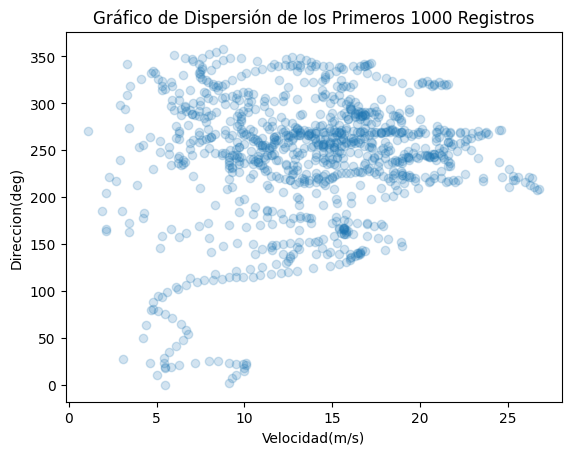

In [7]:
def graficar_dispersion_primeros_1000(modelo):
    # Seleccionar las primeras 1000 filas para "Velocidad(m/s)" y "Direccion(deg)"
    subconjunto = modelo.iloc[:1000]
    velocidad = subconjunto["Velocidad(m/s)"]
    direccion = subconjunto["Direccion(deg)"]
    
    # Crear un gráfico de dispersión
    plt.scatter(velocidad, direccion, alpha=0.2)
    plt.xlabel("Velocidad(m/s)")
    plt.ylabel("Direccion(deg)")
    plt.title("Gráfico de Dispersión de los Primeros 1000 Registros")
    plt.show()

modelo = leer_modelo("C:/Users/Freddy/OneDrive/Escritorio/Proyectos py/Repositorio 1 github/Evaluacion 4._analisis_de_datos/model.txt")

graficar_dispersion_primeros_1000(modelo)

<center><h2>Matriz de figuras de dispersión de los primeros 1000 registros con mayor velocidad de viento</h2></center>

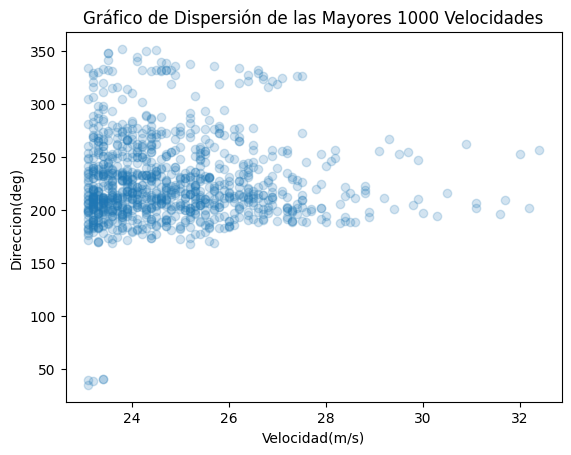

In [8]:
def graficar_dispersion_mayor_velocidad_1000(modelo):
    # Seleccionar las 1000 filas con mayor "Velocidad(m/s)"
    mayores_velocidades = modelo.nlargest(1000, "Velocidad(m/s)")
    
    # Suponiendo que "Direccion(deg)" es la columna a graficar contra "Velocidad(m/s)"
    plt.scatter(mayores_velocidades["Velocidad(m/s)"], mayores_velocidades["Direccion(deg)"], alpha=0.2)
    plt.xlabel("Velocidad(m/s)")
    plt.ylabel("Direccion(deg)")
    plt.title("Gráfico de Dispersión de las Mayores 1000 Velocidades")
    plt.show()

graficar_dispersion_mayor_velocidad_1000(modelo)

<center><h2>Histograma de la velocidad del viento con 36 particiones</h2></center>

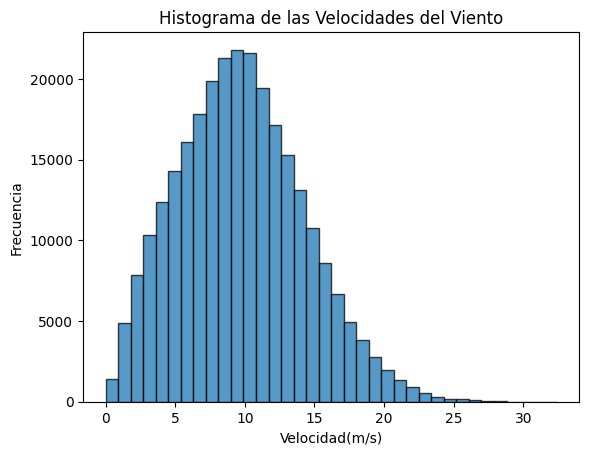

In [9]:
def graficar_histograma_velocidad(modelo):
    # Graficar el histograma con 36 particiones
    plt.hist(modelo["Velocidad(m/s)"], bins=36, alpha=0.75, edgecolor='black')
    
    # Añadir etiquetas y título
    plt.xlabel("Velocidad(m/s)")
    plt.ylabel("Frecuencia")
    plt.title("Histograma de las Velocidades del Viento")
    
    # Mostrar el gráfico
    plt.show()

graficar_histograma_velocidad(modelo)

<center><h2>Histórico mensual de la velocidad media del viento</h2></center>

Año   Mes
1984  1      13.821505
      2      10.043534
      3       8.708199
      4       7.939583
      5       8.283871
               ...    
2015  5       9.739382
      6       9.018056
      7       9.500134
      8       8.748522
      9       8.111250
Name: Velocidad(m/s), Length: 381, dtype: float64



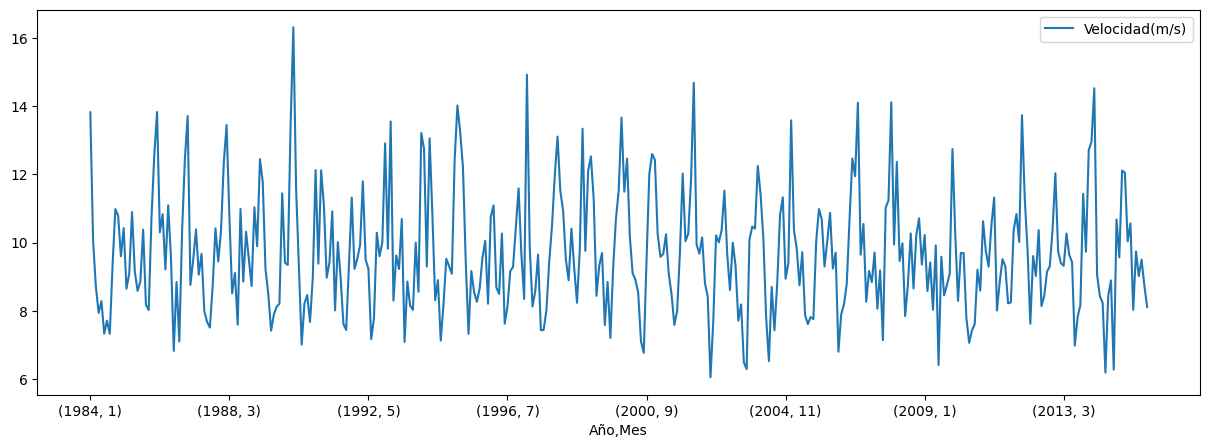

Año   Mes
1984  1      13.821505
      2      10.043534
      3       8.708199
      4       7.939583
      5       8.283871
               ...    
2015  5       9.739382
      6       9.018056
      7       9.500134
      8       8.748522
      9       8.111250
Name: Velocidad(m/s), Length: 381, dtype: float64

In [10]:
def velocidad_media_mensual(modelo):
    mensual = modelo["Velocidad(m/s)"].groupby([modelo.index.year,
                                                modelo.index.month]).mean()
    mensual.rename_axis(index=["Año", "Mes"], inplace=True)
    print(mensual, end="\n\n")
    
    mensual.plot(legend=True, figsize=(15, 5))
    plt.show()
    return mensual
velocidad_media_mensual(modelo)